In [55]:
import os
import pandas as pd

# Task1: Concatenate all data files into a single csv

In [56]:
files=[file for file in os.listdir('./Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

all_data=pd.read_csv("all_data.csv")

# Clean up data 

## Remove rows containing nan(float) from data as float date not allowed

In [57]:
nan_df=all_data[all_data.isna().any(axis=1)]
all_data=all_data.dropna(how='all')

## Remove datas having month as 'Or'

In [58]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

## Convert 'str' columns Quantity Ordered and Price Each into 'int' for calculating sales data

In [59]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

# Augment data with additional columns for making analysis easier

# Task2: Add a month column for each row

In [60]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')

# Task3: Add a sales column where sales=Quantity ordered*Price Each

In [61]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Task4: Add a city column

In [62]:
def get_city(address):
    return(address.split(',')[1])

def get_state(address):
    return(address.split(',')[2].split(' ')[1])   #get state by removing leading and trailing white spaces

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+'('+get_state(x)+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Data Exploration

# Question1: What was the best month for sales? How much was earned that month?

In [63]:
results=all_data.groupby('Month').sum()

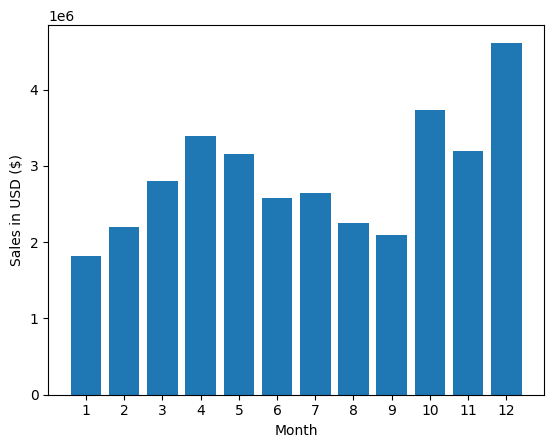

In [64]:
import matplotlib.pyplot as plt

months=range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.show()

### From the above plot we can see that the best month for sales was December where more than 4 million USD was earned

# Question2: Which city has the highest amount of sales

In [65]:
res=all_data.groupby('City').sum()

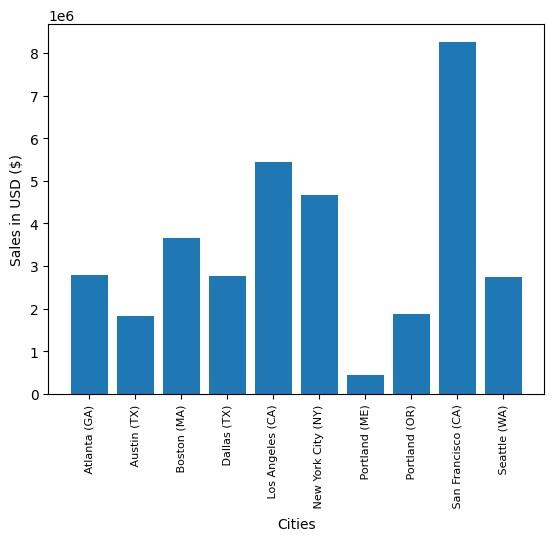

In [66]:
import matplotlib.pyplot as plt

cities=[city for city, df in all_data.groupby('City')]
plt.bar(cities, res['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
plt.show()

### The plot shows us that San Fransisco has the highest amount of sales among all other cities

# Question3: What time should advertisements be displayed to maximize likelihood of customers buying product

In [67]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

C:\Users\Shilpa\AppData\Local\Temp\ipykernel_22460\1906829197.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\Shilpa\AppData\Local\Temp\ipykernel_22460\1906829197.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


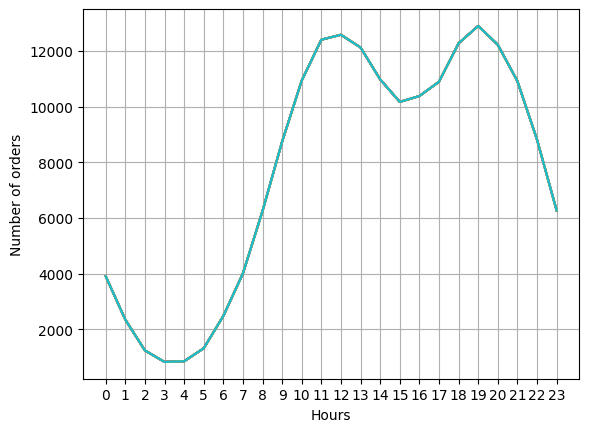

In [68]:
import matplotlib.pyplot as plt
order_counts = all_data.groupby('Hour').count()     #this is a pandas series
hours = order_counts.index.values
counts = order_counts.values
plt.plot(hours, counts)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

### Therefore, peak advertising time must be around 11 am and 7 pm

# Question4: What products are most often sold together?

In [82]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Shilpa\AppData\Local\Temp\ipykernel_22460\1993831354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [70]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))  #To count products bought as pairs we give second parameter as 2

for key, value in count.most_common(10):   #most_common gives most common count from data           
    print(key, value)

#using this data the business can analyse what products can be sold together to improve sales.

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### From the above data, we can see that iPhone and Lightning Charging Cable have been the most commonly bought pairs. Hence, businesses can sell them together to improve sales

# Question5: What product sold the most and why do you think it sold good?

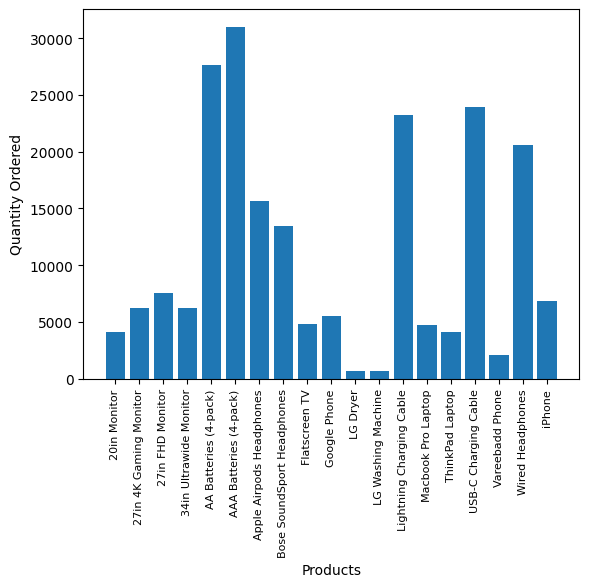

In [71]:
import matplotlib.pyplot as plt
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

### AAA Batteries have sold the most and the reason could be that it costs less as compared to other items

### Let's compare the prices of each item to their quantity ordered to come up with a conclusion

C:\Users\Shilpa\AppData\Local\Temp\ipykernel_22460\484872585.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_array, rotation='vertical', size=8)


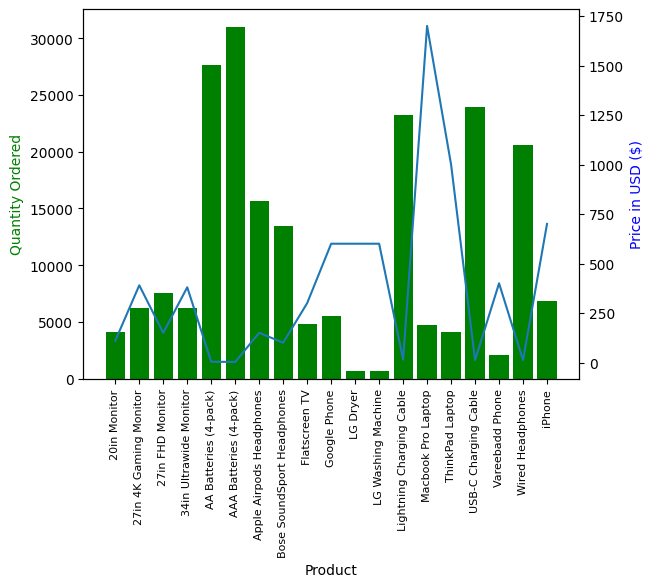

In [81]:
import numpy as np

products_array = np.array(products)
quantity_ordered_array = np.array(quantity_ordered)
prices_array = np.array(prices)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products_array, quantity_ordered_array, color='g')
ax2.plot(products_array, prices_array)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD ($)', color='b')
ax1.set_xticklabels(products_array, rotation='vertical', size=8)
plt.show()

### We can see from the above plot that products that have less price have been bought in bulk. Eg: AAA Batteries
### Whereas those that cost higher have been ordered less. Eg: LG Dryer
### Although, an inconsistency arises in the analysis of Macbook Pro and ThinkPad Laptop. These products have been bought at relatively larger amounts even if they cost the highest.